In [8]:
import random
# BMI를 계산해서 레이블을 리턴하는 함수
# thin 1, normal 2, fat 3
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "1"
    if bmi < 25: return "2"
    return "3"
# 출력 파일 준비하기
fp = open("c:/data/bmi/bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\n")
# 무작위로 데이터 생성하기
cnt = {"1":0, "2":0, "3":0}
for i in range(20000):
    h = random.randint(120,200) #randint : 정수형난수
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f"{h},{w},{label}\n")
fp.close()
print(cnt,"건의 데이터가 생성되었습니다.")

{'1': 6415, '2': 5922, '3': 7663} 건의 데이터가 생성되었습니다.


In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 로딩
df = pd.read_csv("c:/data/bmi/bmi.csv")
df.head()

,height,weight,label
0,166,41,1
1,171,68,2
2,187,70,2
3,158,67,3
4,160,70,3


In [3]:
train_cols = df.columns[:2] #0,1 필드
X = df[train_cols] # 독립변수
y = df["label"]


In [4]:
y.value_counts()


3    7643
1    6411
2    5946
Name: label, dtype: int64

In [5]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['label'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2.label.value_counts()

1    5946
2    5946
3    5946
Name: label, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (1: thin, 2: normal, 3: fat)')

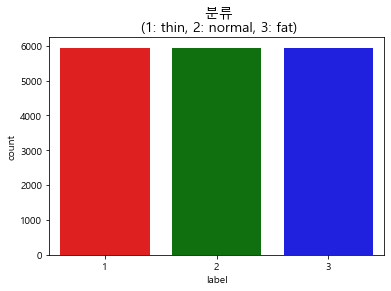

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["red","green","blue"]
sns.countplot('label', data=df2, palette=colors)
plt.title(' 분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [9]:

X=X_sample[train_cols]
y=y_sample['label']

KeyError: 'label'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [17493, 20000]

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
confusion_matrix(y_test, pred)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report)

In [ ]:
df.columns

Index(['height', 'weight', 'label'], dtype='object')

In [ ]:
df.shape

(20000, 3)

In [ ]:
df.describe()


,height,weight,label
count,20000.000000,20000.000000,20000.0000
mean,159.904850,57.389650,2.0602
std,23.397008,13.278401,0.8381
min,120.000000,35.000000,1.0000
25%,140.000000,46.000000,1.0000
50%,160.000000,57.000000,2.0000
75%,180.000000,69.000000,3.0000
max,200.000000,80.000000,3.0000


In [ ]:
#분류를 기준으로 한 평균값들
df.groupby("label").mean()

,height,weight
label,,
1,179.715392,47.315732
2,164.306122,58.704592
3,139.829679,64.871443
